In [1]:
from graphframes import *


In [2]:
from pyspark import *
from pyspark.sql import *

spark = SparkSession.builder.appName('network-analysis').getOrCreate()

df = spark.read.format("csv").option("header", True).load("/Users/teemu/git_projects/koulu/na2020-rating_profiles/data/df.csv")

df = df.withColumnRenamed('user_id', 'id')

In [3]:
df.show()

+---+-----------+--------------+-------------+-------------+
| id|user_gender|rating_profile|rating_gender|rating_weight|
+---+-----------+--------------+-------------+-------------+
|  1|          F|           133|            M|            8|
|  1|          F|           720|            F|            6|
|  1|          F|           971|            M|           10|
|  1|          F|          1095|            M|            7|
|  1|          F|          1616|            M|           10|
|  1|          F|          1978|            M|            7|
|  1|          F|          2145|            M|            8|
|  1|          F|          2211|            M|            8|
|  1|          F|          3751|            M|            7|
|  1|          F|          4062|            M|            3|
|  1|          F|          4633|            M|           10|
|  1|          F|          4842|            M|            5|
|  1|          F|          6518|            F|            6|
|  1|          F|       

In [4]:
#df.filter($"id" < 1000)
df = df.filter(df.id < 500)

In [5]:
edges = df.select('id', 'rating_profile').withColumnRenamed('id', 'src').withColumnRenamed('rating_profile', 'dst')

#df = df.drop('rating_profile')

In [6]:
edges.show()

+---+-----+
|src|  dst|
+---+-----+
|  1|  133|
|  1|  720|
|  1|  971|
|  1| 1095|
|  1| 1616|
|  1| 1978|
|  1| 2145|
|  1| 2211|
|  1| 3751|
|  1| 4062|
|  1| 4633|
|  1| 4842|
|  1| 6518|
|  1| 7576|
|  1| 7724|
|  1| 8305|
|  1| 8923|
|  1| 9345|
|  1| 9729|
|  1|10148|
+---+-----+
only showing top 20 rows



In [7]:
G = GraphFrame(df, edges)

G.inDegrees.show()

+------+--------+
|    id|inDegree|
+------+--------+
| 93893|       1|
| 59318|       3|
| 81355|       2|
|  2294|       5|
|  4937|       6|
| 11722|       1|
| 13865|       1|
| 18314|       2|
| 18634|       2|
| 35350|       2|
| 39457|       3|
| 41998|       2|
| 48078|       2|
| 61819|       2|
| 64985|       3|
| 66401|       1|
| 67896|       1|
| 78888|       1|
| 88277|       2|
|103050|       4|
+------+--------+
only showing top 20 rows



# PageRank

In [8]:
pagernk = G.pageRank(resetProbability=0.01, maxIter=10)

In [9]:
pagernk.vertices.select("id", "pagerank").show()

+---+------------------+
| id|          pagerank|
+---+------------------+
|356|0.4338257328124394|
|356|0.4338257328124394|
|356|0.4338257328124394|
|356|0.4338257328124394|
|356|0.4338257328124394|
|356|0.4338257328124394|
|356|0.4338257328124394|
|356|0.4338257328124394|
|356|0.4338257328124394|
|356|0.4338257328124394|
|356|0.4338257328124394|
|356|0.4338257328124394|
|356|0.4338257328124394|
|356|0.4338257328124394|
|356|0.4338257328124394|
|356|0.4338257328124394|
|356|0.4338257328124394|
|356|0.4338257328124394|
|356|0.4338257328124394|
|356|0.4338257328124394|
+---+------------------+
only showing top 20 rows



In [10]:
pagernk2 = pagernk.vertices.drop_duplicates(subset=['id'])

In [12]:
pagernk2.show()

+---+-----------+--------------+-------------+-------------+------------------+
| id|user_gender|rating_profile|rating_gender|rating_weight|          pagerank|
+---+-----------+--------------+-------------+-------------+------------------+
|296|          M|          2077|            F|           10|0.4338257328124394|
|467|          M|           466|            F|            8|0.4338257328124394|
|125|          U|          1721|            F|            5|0.4338257328124394|
|451|          F|          1429|            M|            5|0.4338257328124394|
|124|          M|         13906|            F|            2|0.4338257328124394|
|447|          F|           483|            M|            6|0.4338257328124394|
| 51|          M|          1585|            F|            5|0.4338257328124394|
|  7|          F|           328|            M|            5|0.4338257328124394|
|307|          F|           973|            M|            7|0.4338257328124394|
|475|          F|           295|        

In [19]:
counts

[489, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1]

(array([489.,   2.,   1.,   1.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   2.,   0.,   1.,   0.,   0.,   1.]),
 array([ 0.43382573,  3.35979095,  6.28575617,  9.21172139, 12.1376866 ,
        15.06365182, 17.98961704, 20.91558226, 23.84154748, 26.76751269,
        29.69347791, 32.61944313, 35.54540835, 38.47137356, 41.39733878,
        44.323304  , 47.24926922, 50.17523444, 53.10119965, 56.02716487,
        58.95313009]),
 <a list of 20 Patch objects>)

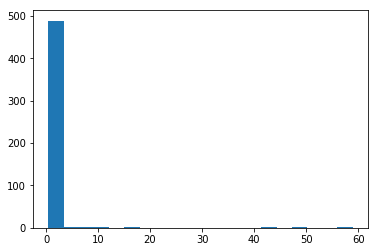

In [20]:
import matplotlib.pyplot as plt
import numpy as np

bins, counts = pagernk2.select('pagerank').rdd.flatMap(lambda x: x).histogram(20)

plt.hist(bins[:-1], bins=bins, weights=counts)

# Connected components

In [37]:
connc = G.connectedComponents()
connc_res.select("id", "component").orderBy("component").show()

Py4JJavaError: An error occurred while calling o436.run.
: java.io.IOException: Checkpoint directory is not set. Please set it first using sc.setCheckpointDir().
	at org.graphframes.lib.ConnectedComponents$$anonfun$2.apply(ConnectedComponents.scala:296)
	at org.graphframes.lib.ConnectedComponents$$anonfun$2.apply(ConnectedComponents.scala:296)
	at scala.Option.getOrElse(Option.scala:121)
	at org.graphframes.lib.ConnectedComponents$.org$graphframes$lib$ConnectedComponents$$run(ConnectedComponents.scala:295)
	at org.graphframes.lib.ConnectedComponents.run(ConnectedComponents.scala:154)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)


# Strongly connected components

In [35]:
strong = G.stronglyConnectedComponents(maxIter=10)
strong.select("id", "component").orderBy("component").show()

+---+-----------+
| id|  component|
+---+-----------+
| 51|25769803776|
| 51|25769803776|
| 51|25769803776|
| 51|25769803776|
| 51|25769803776|
| 51|25769803776|
| 51|25769803776|
| 51|25769803776|
| 51|25769803776|
| 51|25769803776|
| 51|25769803776|
| 51|25769803776|
| 51|25769803776|
| 51|25769803776|
| 51|25769803776|
| 51|25769803776|
|  7|25769803777|
|  7|25769803777|
|  7|25769803777|
|  7|25769803777|
+---+-----------+
only showing top 20 rows



(array([ 193., 1272.,  199.,  701.,  519.,  338.,  247.,  135.,  655.,
         320.,   82.,  285.,   50.,  188., 3322.,  124.,  606.,  116.,
         320.,  263.]),
 array([2.57698038e+10, 1.08662673e+11, 1.91555541e+11, 2.74448410e+11,
        3.57341279e+11, 4.40234148e+11, 5.23127017e+11, 6.06019885e+11,
        6.88912754e+11, 7.71805623e+11, 8.54698492e+11, 9.37591361e+11,
        1.02048423e+12, 1.10337710e+12, 1.18626997e+12, 1.26916284e+12,
        1.35205570e+12, 1.43494857e+12, 1.51784144e+12, 1.60073431e+12,
        1.68362718e+12]),
 <a list of 20 Patch objects>)

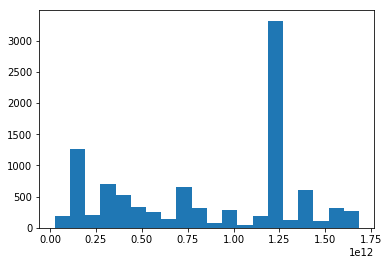

In [36]:
import matplotlib.pyplot as plt

bins, counts = strong.select('component').rdd.flatMap(lambda x: x).histogram(20)

plt.hist(bins[:-1], bins=bins, weights=counts)

# Label Propagation Algorithm (LPA)

In [38]:
label = G.labelPropagation(maxIter=5)
label.select("id", "label").show()

+---+------------+
| id|       label|
+---+------------+
| 42|128849018880|
| 42|128849018880|
| 42|128849018880|
| 42|128849018880|
| 42|128849018880|
| 42|128849018880|
| 42|128849018880|
| 42|128849018880|
| 42|128849018880|
| 42|128849018880|
| 42|128849018880|
| 42|128849018880|
| 42|128849018880|
| 42|128849018880|
| 42|128849018880|
| 42|128849018880|
| 42|128849018880|
| 42|128849018880|
| 42|128849018880|
| 42|128849018880|
+---+------------+
only showing top 20 rows



(array([ 219.,  428.,  199.,  701.,  359.,  324.,  247.,  104., 3390.,
         480.,   82.,  194.,   50.,  284.,  766.,  124.,  517.,  116.,
         320., 1031.]),
 array([2.57698038e+10, 1.08662673e+11, 1.91555541e+11, 2.74448410e+11,
        3.57341279e+11, 4.40234148e+11, 5.23127017e+11, 6.06019885e+11,
        6.88912754e+11, 7.71805623e+11, 8.54698492e+11, 9.37591361e+11,
        1.02048423e+12, 1.10337710e+12, 1.18626997e+12, 1.26916284e+12,
        1.35205570e+12, 1.43494857e+12, 1.51784144e+12, 1.60073431e+12,
        1.68362718e+12]),
 <a list of 20 Patch objects>)

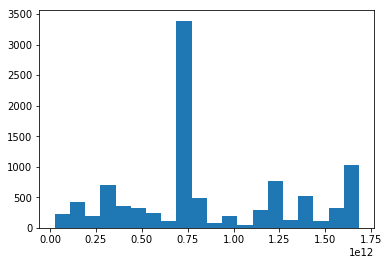

In [39]:
import matplotlib.pyplot as plt

# Show histogram of the 'C1' column
bins, counts = label.select('label').rdd.flatMap(lambda x: x).histogram(20)

# This is a bit awkward but I believe this is the correct way to do it 
plt.hist(bins[:-1], bins=bins, weights=counts)

# Triangle count

In [40]:
triangles = G.triangleCount()
triangles.select("id", "count").show()

+---+-----+
| id|count|
+---+-----+
| 51|    0|
| 51|    0|
| 51|    0|
| 51|    0|
| 51|    0|
| 51|    0|
| 51|    0|
| 51|    0|
| 51|    0|
| 51|    0|
| 51|    0|
| 51|    0|
| 51|    0|
| 51|    0|
| 51|    0|
| 51|    0|
|  7|    0|
|  7|    0|
|  7|    0|
|  7|    0|
+---+-----+
only showing top 20 rows



(array([9935.]), array([0, 0]), <a list of 1 Patch objects>)

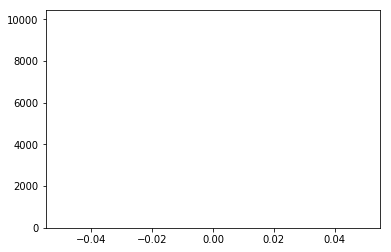

In [42]:
import matplotlib.pyplot as plt

bins, counts = triangles.select('count').rdd.flatMap(lambda x: x).histogram(20)

plt.hist(bins[:-1], bins=bins, weights=counts)

In [20]:
res2.groupby().min('pagerank').show()

+------------------+
|     min(pagerank)|
+------------------+
|0.9317146873742486|
+------------------+



In [19]:
res2.groupby().max('pagerank').show()

+------------------+
|     max(pagerank)|
+------------------+
|2.1575753943228024|
+------------------+



In [ ]:
G.vertices.write.parquet("hdfs://mydata/vertices")
G.edges.write.parquet("hdfs://mydata/edges")

# Load the vertices and edges back.
sameV = sqlContext.read.parquet("hdfs://mydata/vertices")
sameE = sqlContext.read.parquet("hdfs://mydata/edges")